<a href="https://colab.research.google.com/github/sahar7888/DataScience_Project/blob/main/proj3_Add_Image_waterMark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Watermarking Project**

In [ ]:
#import libraries

In [1]:
import cv2
import numpy as np
import requests
from PIL import Image


We will start by importing required libraries like OpenCV for image processing, numpy for mathematical computation, etc.

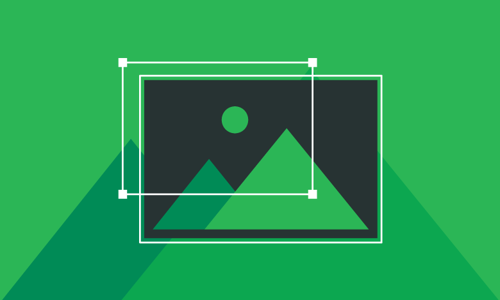

In [2]:
# Reading image form url
image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png', stream=True).raw)
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

For this project we need an image url on which we will apply watermark. We will load the image using the url of the image from google images. You can use any image that you desire and replace the url of the image with current url. Next we will read and resize the image and finally store it into two variables for logo and text watermarking.

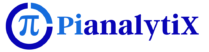

In [3]:
# Reading logo form url
logo = Image.open(requests.get('https://pianalytix.com/wp-content/uploads/2020/05/cropped-pianalytiX-full-logo-square-2-209x52.png', stream=True).raw)
logo

In [4]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

In order to use these images we will first convert them into rbg format and store it as a numpy array. Similarly, we will also extract the shape i.e. it's height and width.

In [5]:
# Get the center of the original. It's the location where we will place the watermark
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

We will place our watermark in the center of the image so for that we need to calculate the center of the image. Here, we will find out the center coordinates of the image using height and width of the image.

In [6]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Add the Logo to the Roi
result = cv2.addWeighted(roi, 1, logo, 1, 0)
# Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)
# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

A Region of Interest defined as the area we need to place our watermark on. Here, we will find out ROI using the coordinates we found above. Next we will use OpenCV to merge our logo on ROI. Similarly we will also add a line or a pattern on our image.

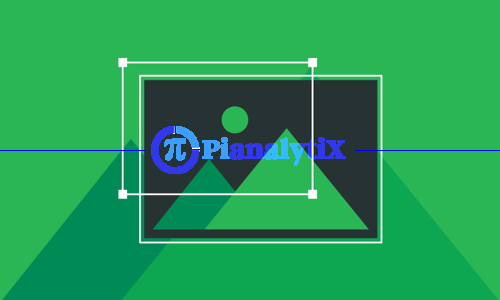

In [7]:
# Ploting logo watermark image
img = Image.fromarray(image_logow, 'RGB')
img

Now we will convert the image from array to RGB and visualize it.

In [8]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='Pianalytix', org=(w_image - 95, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(0,0,255), thickness=2, lineType=cv2.LINE_4);

Next we shall see how we can use a text as a watermark. We will convert our image into RGB and save it as a numpy array. To put a text as a watermark we will be using putText() function of OpenCV. Here we can use different features like size of the text, thickness of the text, font family, etc.

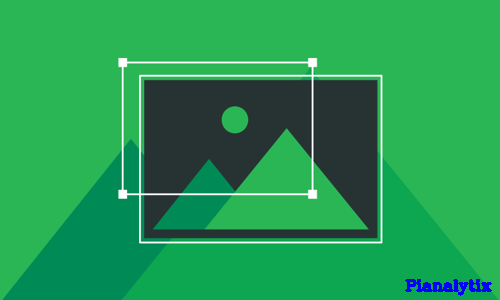

In [9]:
# Plotting text watermark image
timg = Image.fromarray(image_text, 'RGB')
timg

To visualize the image we need to convert it back to RGB format.

# **Conclusion:**

Adding a watermark to an image works as a copyright. Different organizations can use it to make their content secure so that their content cannot be misused without thier license or a paid version. In this project we saw how easily we can use OpenCV to add watermarks to our images.

# **Creating App**

In [2]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.8 MB/s eta 0:00:00


In [30]:
%%writefile App.py

import gradio as gr
import cv2
import numpy as np
from PIL import Image

# Function to add watermark (logo or text) to the image
def add_watermark(image, watermark_type, text=None, logo=None, opacity=1.0):
    image_logow = image.resize((500, 300))
    image_logow = np.array(image_logow.convert('RGB'))

    h_image, w_image, _ = image_logow.shape

    if watermark_type == "Logo" and logo is not None:
        logo = logo.resize((int(w_image * 0.3), int(h_image * 0.1)))  # Resize logo to 30% of the image width
        logo = np.array(logo.convert('RGB'))
        h_logo, w_logo, _ = logo.shape

        # Center placement for logo
        center_y = int(h_image / 2)
        center_x = int(w_image / 2)
        top_y = center_y - int(h_logo / 2)
        left_x = center_x - int(w_logo / 2)
        bottom_y = top_y + h_logo
        right_x = left_x + w_logo

        # Get ROI and add logo with opacity
        roi = image_logow[top_y: bottom_y, left_x: right_x]
        result = cv2.addWeighted(roi, 1, logo, opacity, 0)

        # Replace the ROI on the image
        image_logow[top_y: bottom_y, left_x: right_x] = result

        return Image.fromarray(image_logow)

    elif watermark_type == "Text" and text:
        # Add text watermark at the bottom-right corner
        cv2.putText(image_logow, text=text, org=(w_image - 100, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX,
                    fontScale=0.6, color=(0, 0, 255), thickness=2, lineType=cv2.LINE_AA)

        return Image.fromarray(image_logow)

    return image  # Return original image if no watermark added

# Create the Gradio interface
def gradio_interface():
    with gr.Blocks() as demo:
        gr.Markdown("## Image Watermarking App")

        gr.Markdown("""
        ### Add Watermarks to Your Images
        This application allows you to add custom watermarks to your images. You can either add a **Text Watermark** or use a **Logo Watermark**.

        **Steps**:
        1. Upload your image.
        2. If using a logo watermark, upload your logo.
        3. Select the type of watermark (text or logo).
        4. Customize the watermark by adding text or adjusting logo opacity.
        5. See the output image with the watermark applied.
        """)



        # # Output watermarked image
        image_input = gr.Image(label="Upload Image", type="pil")  # Upload original image
        logo_input = gr.Image(label="Upload Logo (optional, for Logo Watermark)", type="pil")  # Upload logo (optional)

        watermark_type = gr.Radio(["Text", "Logo"], label="Watermark Type", value="Text")
        text_input = gr.Textbox(label="Watermark Text (for Text Watermark)", value="MyArt.Inc", placeholder="Enter text for text watermark")
        opacity_slider = gr.Slider(0.1, 1.0, step=0.1, label="Logo Opacity (for Logo Watermark)", value=1.0)
        output_image = gr.Image(label="Watermarked Image")

        # Function to update the watermark based on user input
        def update_watermark(image, watermark_type, text, logo, opacity):
            if watermark_type == "Logo" and logo is None:
                return "Please upload a logo for the logo watermark."
            return add_watermark(image, watermark_type, text, logo, opacity)

        # Link inputs to output
        inputs = [image_input, watermark_type, text_input, logo_input, opacity_slider]
        gr.Interface(update_watermark, inputs, output_image).launch()

    demo.launch()

# Run the interface
gradio_interface()


Writing App.py
